# Perceptron Coding Activity

Students need to code portions of the `PerceptronModel` Class:
* `predict` function 
* `computeWeightUpdate` function

Until the portions are coded, the perceptron is unable to learn and the training mechanism will stop after a maximum number of training steps


In [1]:
import numpy as np

import matplotlib.pyplot as plt

## Helper Functions

In [2]:
def drawDecisionBoundary(model,X,y,title):
    x1_min, x1_max = (X[:, 1].min() - 0.2), (X[:, 1].max() + 0.2)
    x2_min, x2_max = (X[:, 2].min() - 0.2), (X[:, 2].max() + 0.2)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                     np.arange(x2_min, x2_max, 0.01))               
    meshcount = xx1.ravel().shape[0]
    f, ax = plt.subplots(figsize=(10, 8))
    Z = model.predict(np.c_[np.ones(meshcount,),xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1,xx2, ~Z, alpha = 0.4, cmap="binary")
    #ax.scatter(X[:, 0], X[:, 1], c=-y, cmap="jet", alpha=0.6)
    c = np.array([[0, 0, 0], [0, 255, 0]])/255  #generates black and green colors
    colors =np.dot(y,c[[1],:])+np.dot((1-y),c[[0],:])  #assigns colors per boolean label (0=black,1=green)
    ax.scatter([X[:, 1]], [X[:, 2]],  cmap="jet", alpha=0.6, color=colors)
    ax.set_title("Decision boundary for "+ title)
    plt.xlabel('x1')
    plt.ylabel('x2')


def displayResults(model,X,y,title):
    drawDecisionBoundary(model,X,y,title)
    
    plt.figure()
    plt.plot(model.weightHistory[:,:].T)
    plt.legend(["bias","w1","w2"])
    plt.title("Weight History for "+ title)
    plt.xlabel("training step")
    plt.ylabel("weight")
    
    plt.figure()
    plt.plot(model.errorHistory)
    plt.title("Error Count History for " + title)
    plt.legend(["error count"])
    plt.xlabel("training step")
    plt.ylabel("Number of Errors")
    plt.show()

## Perceptron Model Class definition

Student code requried in the following functions

* `predict` function 
* `computeWeightUpdate` function

In [3]:
class PerceptronModel:
    
    def __init__(self):
        self.alpha = alpha
        self.w = []   #to allow continued training with existing loaded weights
        self.weightHistory = []
        self.errorHistory = []
        self.trainStepCount = 0
        
    def predict(self,X):
        '''this should compute a column vector of predictions on X
        '''
        yhat = np.zeros((X.shape[0],1))<1 #placeholder to generate set of boolean Falses
        
        ########## - Insert Student Code Here to compute yhat ################
        net = np.dot(X, self.w)
        yhat = net>0.
        #######################################################################
        
        
        return yhat
        
    def computePerceptronError(self,X,D):
        yhat = self.predict(X)
        errorCount = np.sum(D!=yhat)
        return errorCount    
    
    def computeWeightUpdate(self,x,D):
        '''Given a single example (x) with desired label D, 
        this should compute the weight updates on the perceptron weights
        for one training step of the perceptron 
        (note - this function doesn't alter the model)
        '''        
        yhat=self.predict(x)
        deltaW = np.zeros(self.w.shape)  #placeholder
        
        ############ - Insert Student Code Here to compute deltaW - ###########
        err = D-yhat
        deltaW = (self.alpha*x*err.item()).T
        #######################################################################
        
        
        return deltaW      
        
   
    def fit(self,X,y,alpha=0.1, maxSteps = 200, errorTolerance = 0.):
        '''runs iterative single-observation training to train a perceptron'''
        obsCount = np.size(X,axis=0)
        featureCount = np.size(X,axis=1)
        pm = self
        pm.alpha = alpha
        #initialize random weights
        weights = np.random.randn(featureCount,1)
        pm.w = weights
        pm.weightHistory = weights
        error = pm.computePerceptronError(X,y)
        pm.errorHistory = error
        pm.trainStepCount = 0
        #update model on single example at a time
        while (error > errorTolerance) & (pm.trainStepCount < maxSteps):
            obsIndex = np.random.choice(np.arange(obsCount))  #draw random example
            x = X[obsIndex,:]
            D = y[obsIndex]
            weightUpdate = pm.computeWeightUpdate(x,D)
            weights = weights + weightUpdate
            error = pm.computePerceptronError(X,y) 
            pm.weightHistory = np.hstack((pm.weightHistory, weights))
            pm.errorHistory = np.hstack((pm.errorHistory,error))
            pm.w = weights
            pm.trainStepCount+=1
        return pm


## Function to train a perceptron

In [4]:
def trainPerceptron(X,y,alpha,maxSteps):
    obsCount = np.size(X,axis=0)
    featureCount = np.size(X,axis=1)
    
    pm = PerceptronModel()
    pm.alpha = alpha
    weights = np.random.randn(featureCount,1)
    pm.w = weights
    pm.weightHistory = weights
    error = pm.computePerceptronError(X,y)
    pm.errorHistory = error
    pm.trainStepCount = 0
    #update model on single example at a time
    while (error > 0.) & (pm.trainStepCount < maxSteps):
        obsIndex = np.random.choice(np.arange(obsCount))
        x = X[obsIndex,:]
        D = y[obsIndex]
        weightUpdate = pm.computeWeightUpdate(x,D)
        #print(weightUpdate)
        weights = weights + weightUpdate
        error = pm.computePerceptronError(X,y) 
        pm.weightHistory = np.hstack((pm.weightHistory, weights))
        pm.errorHistory = np.hstack((pm.errorHistory,error))
        pm.w = weights
        pm.trainStepCount+=1
    #pm.error = error
    return pm
        

## Setting up the datasets for AND, OR and XOR

In [5]:
#setup
alpha = 0.1
maxSteps = 200
errorTolerance = 0.

#design matrix (note first member is bias term in design matrix)
X = np.matrix([[1.,0.,0.],[1.,0.,1.],[1.,1.,0.],[1.,1.,1.]])

#AND dataset labels 
yAND = np.matrix('0.;0.;0.;1.')
#OR dataset labels
yOR = np.matrix('0.;1.;1.;1.')
#XOR dataset labels
yXOR = np.matrix('0.;1.;1.;0.')

## Train the perceptron for AND

[[False]
 [False]
 [False]
 [ True]]


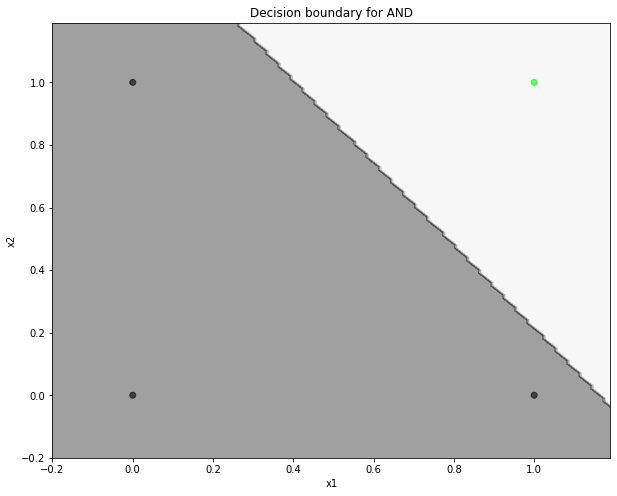

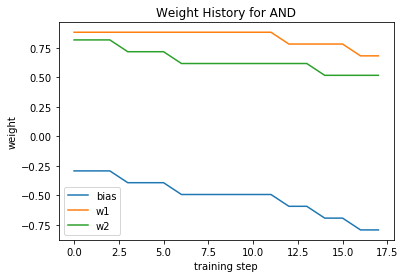

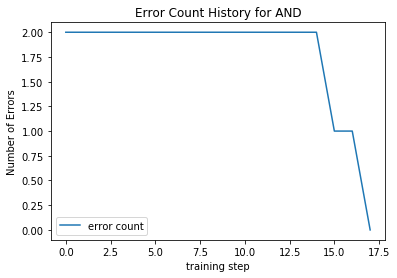

In [6]:
#train and return a model on the AND dataset
#pmAND = trainPerceptron(X,yAND,alpha,maxSteps)


pmAND = PerceptronModel()
pmAND.fit(X,yAND,alpha,maxSteps,errorTolerance)
print(pmAND.predict(X))
displayResults(pmAND,X,yAND,"AND")


## Train the perceptron for OR

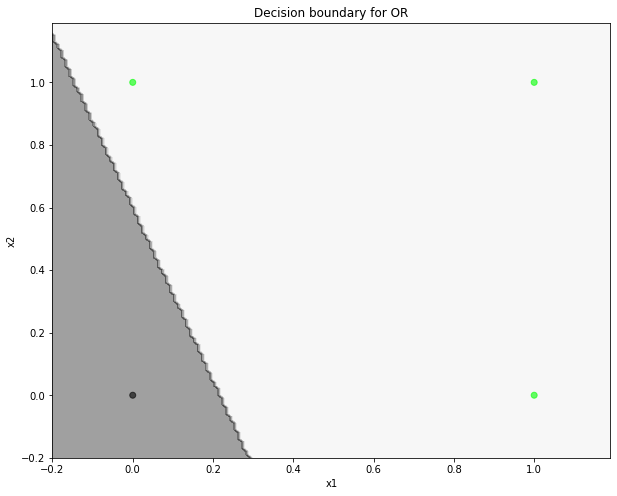

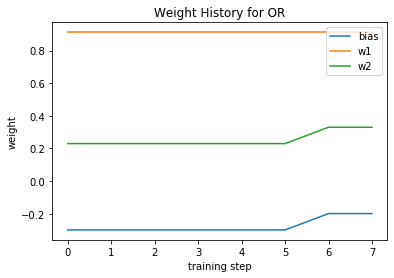

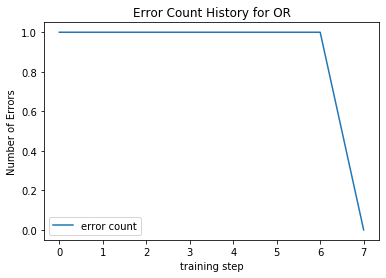

In [7]:
#train and return a model on the OR dataset
pmOR = PerceptronModel()

pmOR.fit(X,yOR,alpha,maxSteps,errorTolerance)
displayResults(pmOR,X,yOR,"OR")

## Train the perceptron for XOR

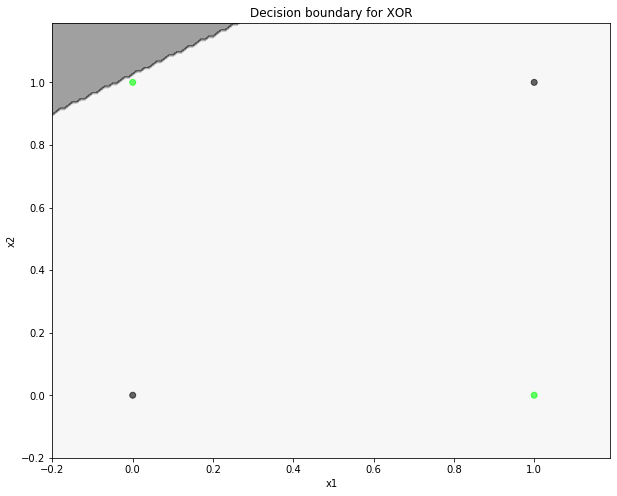

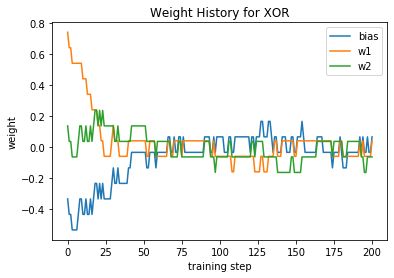

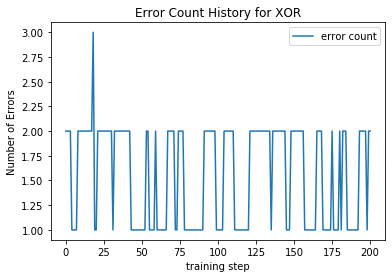

In [8]:
#train and return a model on the OR dataset
pmXOR = PerceptronModel()
pmXOR.fit(X,yXOR,alpha,maxSteps,errorTolerance)
displayResults(pmXOR,X,yXOR,"XOR")